<a href="https://colab.research.google.com/github/uribo1008/line_broadcast_msg/blob/main/B2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3d425bce9dcd179b248e1bf48430a5df6340428622373cd944ac08c0a25a09f5
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.decomposition import PCA

japanize_matplotlib.japanize()

In [12]:
from google.colab import files
uploaded = files.upload()

Saving pca_sample.csv to pca_sample.csv


In [13]:
scores = pd.read_csv("pca_sample.csv", index_col = 0, header = 0)

In [14]:
scores.shape #学生7人の5個分のデータを検証している

(7, 5)

In [15]:
scores

,Math,Sci,Lang,Eng,Soc
name,,,,,
Tanaka,89,90,67,46,50
Sato,57,70,80,85,90
Suzuki,80,90,35,40,50
Honda,40,60,50,45,55
Kawata,78,85,45,55,60
Yoshida,55,65,80,75,85
Saito,90,85,88,92,95


In [26]:
pca = PCA(n_components = "mle" , whiten = False)#学生は5個のデータでみられているから５次元

In [27]:
pca.fit(scores)

PCA(n_components='mle')

In [28]:
pca.n_components_

3

In [29]:
pca.explained_variance_ratio_#1つ目の軸で6割程度の結果が表現できる、2個目のデータで3割程度の表現ができる

array([0.6688013 , 0.28791087, 0.04119209])

In [30]:
pca.components_

array([[-0.04318455, -0.11661043,  0.55136578,  0.60073709,  0.56537406],
       [ 0.84543226,  0.51948621,  0.08791982,  0.08720053, -0.00667425],
       [ 0.02427423, -0.12015885,  0.8167789 , -0.37523513, -0.4207653 ]])

In [31]:
x = pca.transform(scores)
x

array([[-21.21097689,  21.47715546,  16.13893274],
       [ 35.71460142, -11.68959258,  -3.08132203],
       [-42.0704435 ,  10.53162768,  -7.96504946],
       [-22.74370588, -37.14882026,   2.94042802],
       [-21.22256751,   8.3637958 ,  -9.08119457],
       [ 27.54978153, -16.81652223,   3.32710151],
       [ 43.98331082,  25.28235614,  -2.27889621]])

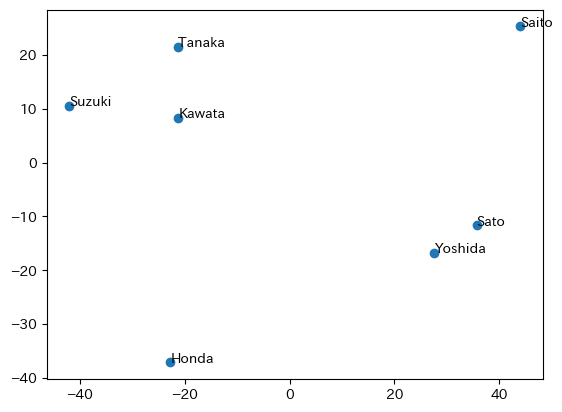

In [32]:
plt.scatter(x[:,0], x[:,1])
for d, l in zip(x, scores.index.values):
  plt.text(d[0], d[1], l)